# Milestone 2: Supervised Learning - SARIMA Model

In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose as sd 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

In [2]:
# Load data set with stock market data from 2010 to 2024 (yahoo finance)
df = pd.read_pickle('../data/top500_data_nona.pkl')

In [3]:
display(df.head(10))
print(df.columns.tolist())

Price       Adj Close                                                      \
Ticker              A       AAL      AAPL        ABT      ACGL        ACN   
Date                                                                        
2010-01-04  20.122231  4.496876  6.461977  18.952156  7.994444  32.212460   
2010-01-05  19.903646  5.005957  6.473150  18.799036  7.967778  32.411537   
2010-01-06  19.832930  4.798555  6.370183  18.903446  7.933333  32.756092   
2010-01-07  19.807222  4.939964  6.358408  19.060040  7.886667  32.725471   
2010-01-08  19.800783  4.845692  6.400681  19.157484  7.871111  32.595306   
2010-01-11  19.813646  4.751418  6.344217  19.254921  7.846667  32.564678   
2010-01-12  19.575775  4.789126  6.272050  19.199244  7.868889  32.357944   
2010-01-13  19.730062  5.166223  6.360522  19.381519  7.911111  32.725471   
2010-01-14  20.025801  5.269926  6.323684  19.402557  7.900000  33.016426   
2010-01-15  19.562920  5.185078  6.218002  19.451632  7.885556  32.779068   

Price                                                                         \
Ticker           ADBE        ADI        ADM        ADP       ADSK        AEE   
Date                                                                           
2010-01-04  37.090000  22.530371  21.623404  26.725899  25.670000  16.357771   
2010-01-05  37.700001  22.494801  21.740210  26.582369  25.280001  16.292957   
2010-01-06  37.619999  22.452116  21.685232  26.519974  25.340000  16.180998   
2010-01-07  36.889999  22.274269  21.458487  26.507500  25.480000  16.027790   
2010-01-08  36.689999  22.402323  21.190519  26.470058  26.260000  15.915827   
2010-01-11  36.209999  22.274269  21.204264  26.588615  26.250000  16.045465   
2010-01-12  35.660000  21.349436  20.977514  26.401419  25.889999  16.027790   
2010-01-13  36.279999  21.342319  21.066833  26.594858  26.250000  16.133862   
2010-01-14  35.900002  21.320974  21.121809  26.519974  26.600000  16.192776   
2010-01-15  35.869999  20.602453  20.984383  26.376451  26.080000  16.110291   

Price                                                                        \
Ticker            AEP       AES        AFL        AIG        AIZ        AJG   
Date                                                                          
2010-01-04  19.888439  9.562480  16.646255  19.506451  22.654465  15.202732   
2010-01-05  19.660757  9.464546  17.129158  19.140995  23.330494  15.121030   
2010-01-06  19.859976  9.366617  17.279638  19.016994  23.262894  15.127841   
2010-01-07  20.030741  9.373610  17.465094  18.651531  23.548325  15.032526   
2010-01-08  20.269812  9.639429  17.290129  19.147518  23.563349  15.073371   
2010-01-11  20.480425  9.702387  17.745041  19.336775  23.728596  15.093794   
2010-01-12  20.275501  9.590465  17.654060  18.573221  23.510771  15.182307   
2010-01-13  20.525965  9.849287  17.846519  18.964785  23.728596  15.175498   
2010-01-14  20.605648  9.856283  18.080973  18.664589  23.480715  15.134643   
2010-01-15  20.497496  9.821306  17.885014  18.312178  22.932384  14.978061   

Price                                                                    \
Ticker           AKAM        ALB       ALGN        ALL       AMAT   AMD   
Date                                                                      
2010-01-04  25.920000  31.243988  18.500000  21.949137  11.185110  9.70   
2010-01-05  26.690001  31.186565  18.010000  22.310017  11.099069  9.71   
2010-01-06  26.469999  31.243988  17.480000  22.317234  11.075605  9.57   
2010-01-07  26.480000  31.022518  17.430000  22.432724  10.958282  9.47   
2010-01-08  26.480000  31.490065  17.660000  22.526552  11.380655  9.43   
2010-01-11  26.389999  31.350620  17.540001  22.526552  11.630951  9.14   
2010-01-12  26.160000  30.915867  17.230000  22.504902  11.106893  8.65   
2010-01-13  26.040001  31.227583  17.580000  22.706991  11.161648  9.15   
2010-01-14  26.879999  31.104532  17.129999  22.836914  11.224222  9.00   
2010-01-15  26.610001  31.079

[('Adj Close', 'A'), ('Adj Close', 'AAL'), ('Adj Close', 'AAPL'), ('Adj Close', 'ABT'), ('Adj Close', 'ACGL'), ('Adj Close', 'ACN'), ('Adj Close', 'ADBE'), ('Adj Close', 'ADI'), ('Adj Close', 'ADM'), ('Adj Close', 'ADP'), ('Adj Close', 'ADSK'), ('Adj Close', 'AEE'), ('Adj Close', 'AEP'), ('Adj Close', 'AES'), ('Adj Close', 'AFL'), ('Adj Close', 'AIG'), ('Adj Close', 'AIZ'), ('Adj Close', 'AJG'), ('Adj Close', 'AKAM'), ('Adj Close', 'ALB'), ('Adj Close', 'ALGN'), ('Adj Close', 'ALL'), ('Adj Close', 'AMAT'), ('Adj Close', 'AMD'), ('Adj Close', 'AME'), ('Adj Close', 'AMGN'), ('Adj Close', 'AMP'), ('Adj Close', 'AMT'), ('Adj Close', 'AMZN'), ('Adj Close', 'ANSS'), ('Adj Close', 'AON'), ('Adj Close', 'AOS'), ('Adj Close', 'APA'), ('Adj Close', 'APD'), ('Adj Close', 'APH'), ('Adj Close', 'ARE'), ('Adj Close', 'ATO'), ('Adj Close', 'AVB'), ('Adj Close', 'AVGO'), ('Adj Close', 'AVY'), ('Adj Close', 'AWK'), ('Adj Close', 'AXON'), ('Adj Close', 'AXP'), ('Adj Close', 'AZO'), ('Adj Close', 'BA'), 

In [4]:
# Let us pick a company (Coca Cola) and daily Adjusted Closing price
ticker = 'KO'
company = 'Coca Cola'
attr = 'Adj Close'

In [5]:
# Define a function for generating a quarterly average stock price heat map 
def create_quarterly_heatmap(df,attr):
    heatmap_data = df.copy(deep=True)
    heatmap_data['Year'] = heatmap_data.index.year
    #heatmap_data['Quarter'] = heatmap_data.index.quarter
    heatmap_data['Month'] = heatmap_data.index.month
    heatmap_data_plot = heatmap_data.groupby(["Year", "Month"])[attr].mean().unstack()
    plt.figure(figsize=(20,8))
    sns.heatmap(heatmap_data_plot,cmap="coolwarm",fmt=".2f",annot=True)
    plt.title("Quarterly Average Stock Close price heat map for "+company)
    plt.show()

In [6]:
# Create a data extenion with daily adjusted close price for given stock
daily_close_data = df[[(attr, ticker)]].reset_index()
daily_close_data.columns = daily_close_data.columns.get_level_values(0)
daily_close = daily_close_data.set_index('Date') 
daily_close.head() 

Price,Adj Close
Date,
2010-01-04,18.351234
2010-01-05,18.129238
2010-01-06,18.122810
2010-01-07,18.077763
2010-01-08,17.743168


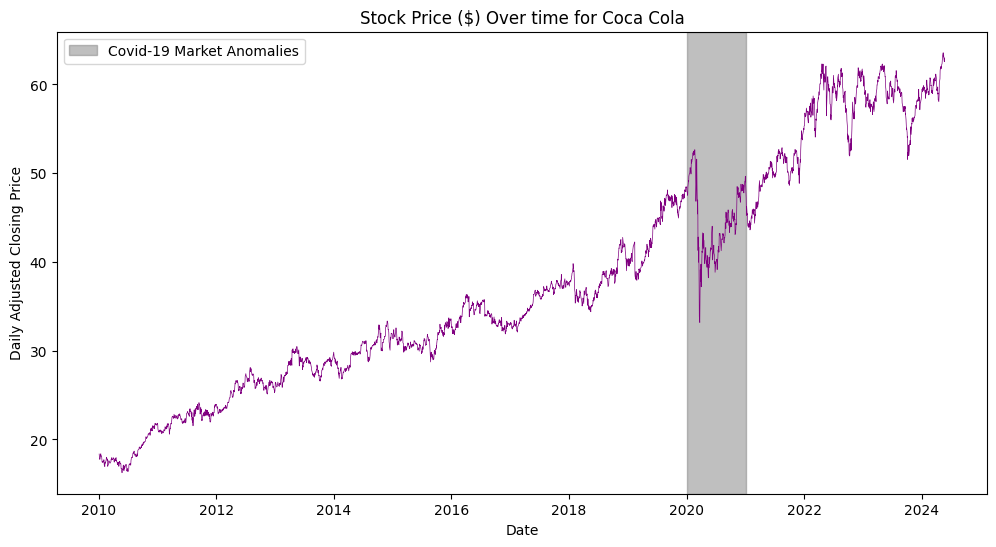

In [7]:
# Plot stock price movement overtime
plt.figure(figsize=(12, 6)) 
plt.plot(daily_close[attr], linewidth=0.5,c='purple')
plt.axvspan('2020','2021',color='grey',alpha=.5)
plt.legend(handles=[mpatches.Patch(color='grey',alpha=.5, label="Covid-19 Market Anomalies")])
plt.title("Stock Price ($) Over time for "+company) 
plt.xlabel("Date") 
plt.ylabel("Daily Adjusted Closing Price") 
plt.show()

In [8]:
# monthly mean resampling of the time series
monthly_close = daily_close.resample('M').mean() 
monthly_close.head()

Price,Adj Close
Date,
2010-01-31,17.891672
2010-02-28,17.482572
2010-03-31,17.549066
2010-04-30,17.606506
2010-05-31,17.055112


In [9]:
# Perform the Dickey-Fuller test
result = adfuller(monthly_close[attr]) 
p_value = result[1] 
print(f'ADF Statistic: {result[0]}') 
print(f'p-value: {p_value}') 
print('Stationary' if p_value < 0.05 else 'Non-Stationary') 

ADF Statistic: -0.06813586541327317
p-value: 0.9525212822934671
Non-Stationary


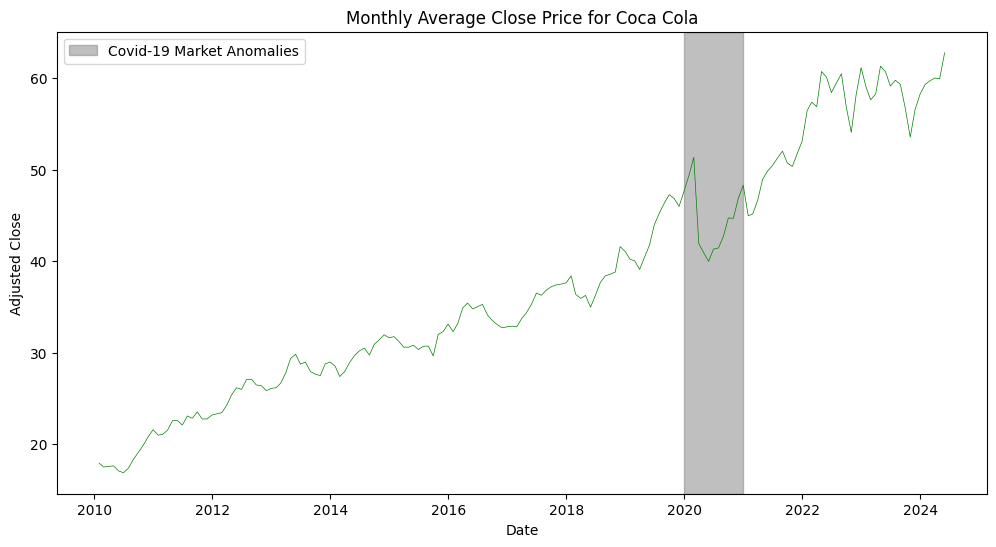

In [10]:
# Plot the monthly resample data
plt.figure(figsize=(12, 6)) 
plt.plot(monthly_close[attr], linewidth=0.5,c='g')
plt.axvspan('2020','2021',color='grey',alpha=.5)
plt.legend(handles=[mpatches.Patch(color='grey',alpha=.5, label="Covid-19 Market Anomalies")])
plt.title("Monthly Average Close Price for " + company) 
plt.xlabel("Date") 
plt.ylabel("Adjusted Close") 
plt.show()

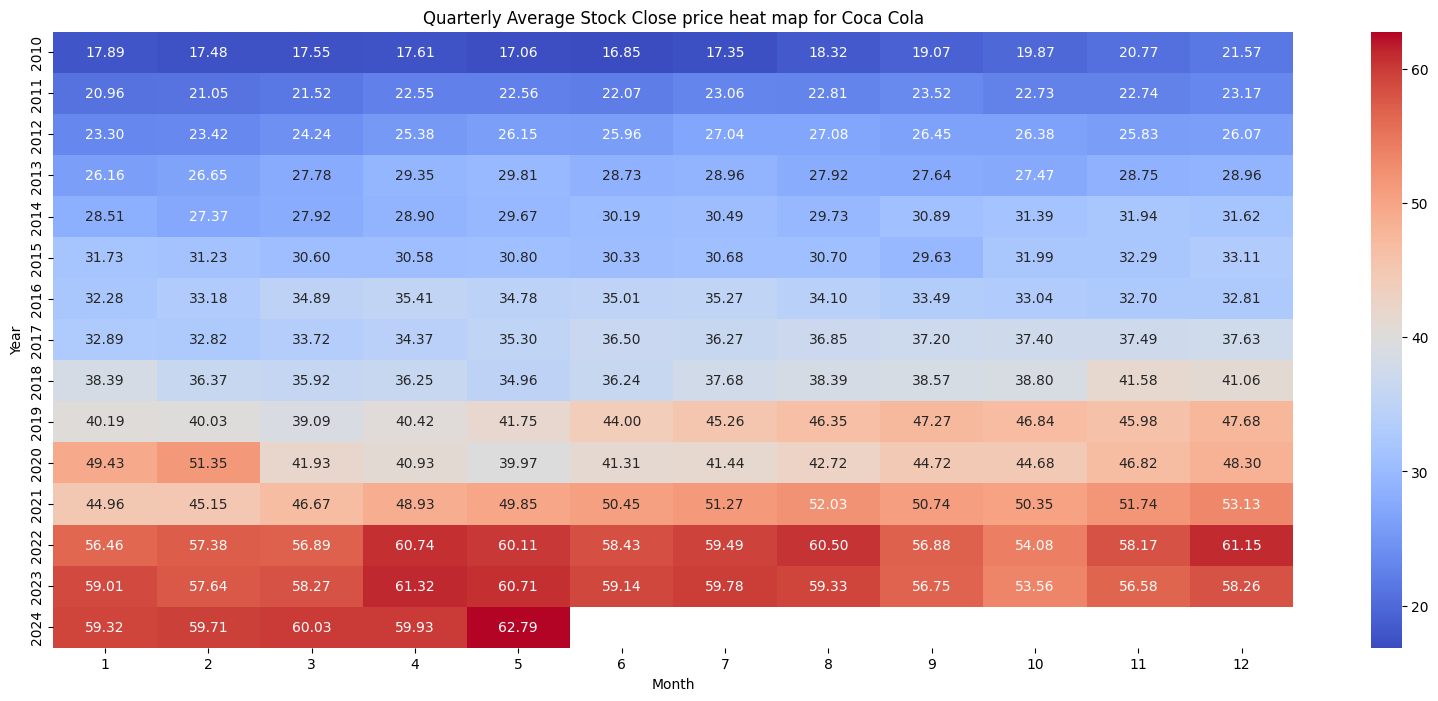

In [11]:
# Heatmap of monthly average stock price
create_quarterly_heatmap(monthly_close,attr)

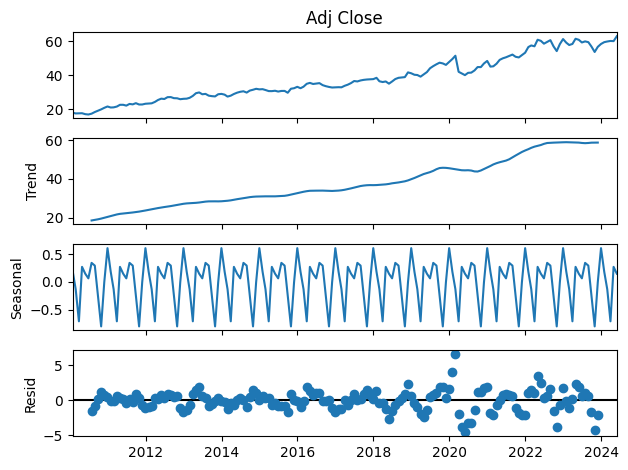

In [12]:
# Decompose time series to find trend and seasonality
decomposition = sd(monthly_close[attr])
decomposition.plot()
plt.show()

<Axes: xlabel='Date'>

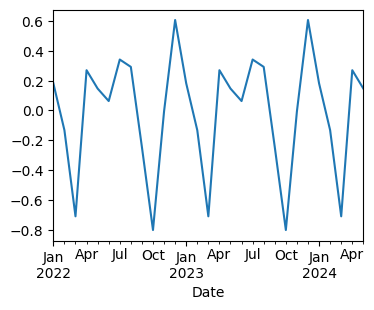

In [13]:
# Observing Seasonality more closely
fig = plt.figure(figsize=(4,3))
decomposition.seasonal['2022':'2024'].plot()

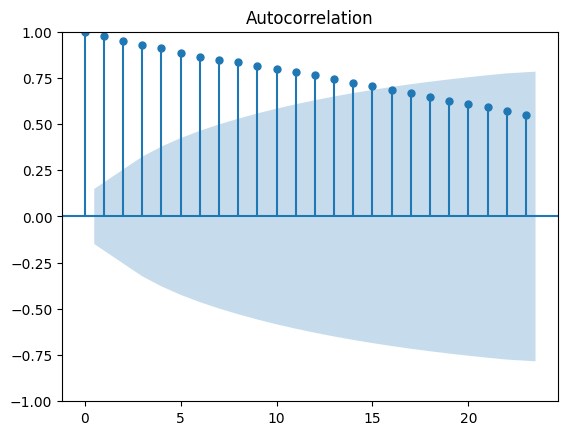

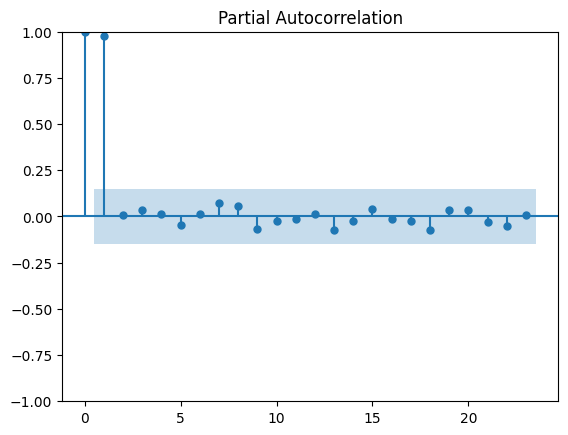

In [14]:
# Plot ACF and PACF 
plot_acf(monthly_close) 
plot_pacf(monthly_close) 
plt.show()

In [15]:
# Prepare the parameter list for SARIMA
values = [0, 1, 2]
#Generate all combinations
combinations = list(itertools.product(values, repeat=3))
# Add the constant value 12 to the end of each tuple
seasonal_combinations = [combo + (12,) for combo in combinations]
seasonal_combinations

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [16]:
# train test split the time series in the order
train_s,test_s = train_test_split(monthly_close,train_size=0.7,shuffle=False)
print(train_s)
print(test_s)

Price       Adj Close
Date                 
2010-01-31  17.891672
2010-02-28  17.482572
2010-03-31  17.549066
2010-04-30  17.606506
2010-05-31  17.055112
...               ...
2019-09-30  47.273650
2019-10-31  46.841790
2019-11-30  45.983671
2019-12-31  47.675152
2020-01-31  49.426725

[121 rows x 1 columns]
Price       Adj Close
Date                 
2020-02-29  51.354879
2020-03-31  41.930922
2020-04-30  40.930064
2020-05-31  39.969525
2020-06-30  41.312944
2020-07-31  41.442084
2020-08-31  42.724562
2020-09-30  44.717429
2020-10-31  44.677233
2020-11-30  46.815817
2020-12-31  48.303129
2021-01-31  44.963854
2021-02-28  45.153063
2021-03-31  46.673298
2021-04-30  48.931349
2021-05-31  49.853991
2021-06-30  50.450283
2021-07-31  51.266126
2021-08-31  52.029830
2021-09-30  50.743819
2021-10-31  50.350083
2021-11-30  51.735435
2021-12-31  53.130490
2022-01-31  56.459534
2022-02-28  57.384454
2022-03-31  56.891616
2022-04-30  60.740447
2022-05-31  60.113290
2022-06-30  58.430282
2022-07-

In [17]:
# Evaluate SARIMA for different combinations of hyperparameters SARIMA (p,d,q) (P,D,Q,s)
aic = []
n=0
for combo in combinations:
    for combo_s in seasonal_combinations:
        # Fit the SARIMA model 
        model = SARIMAX(train_s, order=combo, seasonal_order=combo_s) 
        results = model.fit()
        n=n+1
        print(n)
        aic.append((results.aic,combo,combo_s))
        #print('SARIMA model for '+ str(combo) +' '+ str(combo_s) +' '+ str(results.aic))
#print(aic)
sorted_list  = sorted(aic, key=lambda x: x[0])
print(sorted_list)

1
2


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


3
4
5


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


6
7
8


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


9
10


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


11


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


12
13


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


14


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


15
16
17


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


18


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


19


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


20


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


21
22


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


23


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


24
25
26


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


27
28


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


29


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


30
31


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


32
33
34
35


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


36


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


37


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting paramet

38


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


39
40


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


41


KeyboardInterrupt: 

In [18]:
#Sensitivity analysis
# Evaluate SARIMA for different combinations of parameters seasonal parameters
combo  = (1,1,0)
forecast_periods = 53  # Forecast the next test period 53 months
observed = monthly_close[-forecast_periods:] 
aic_s = []
n=0
for combo_s in seasonal_combinations:
    # Fit the SARIMA model 
    model = SARIMAX(train_s, order=combo, seasonal_order=combo_s) 
    results = model.fit()
    forecast = results.get_forecast(steps=forecast_periods) 
    forecast_mean = forecast.predicted_mean
    mae = mean_absolute_error(observed, forecast_mean) 
    mse = mean_squared_error(observed, forecast_mean) 
    n=n+1
    print(n)
    aic_s.append((results.aic,combo,combo_s,mae,mse))
#print(aic)
sorted_list  = sorted(aic_s, key=lambda x: x[0])
for (a,b,c,d,e) in sorted_list:
    print('SARIMA model for hyperparameter'+ str(b) +' '+ str(c) +' '+ str(a)+' '+ str(d)+' '+ str(e))
#print(sorted_list)

1
2
3
4
5
6
7
8


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


9
10
11
12
13
14
15
16
17


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


18
19
20


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


21
22
23
24
25
26


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


27
SARIMA model for hyperparameter(1, 1, 0) (0, 1, 1, 12) 292.06119944166534 4.303780580955937 27.869498957336482
SARIMA model for hyperparameter(1, 1, 0) (0, 1, 2, 12) 293.7579596632562 4.522272513788777 29.576761626392997
SARIMA model for hyperparameter(1, 1, 0) (1, 1, 1, 12) 293.77076562300033 4.490584174364106 29.245418168921173
SARIMA model for hyperparameter(1, 1, 0) (1, 1, 2, 12) 295.2431901032016 4.269899307860995 28.149384490759708
SARIMA model for hyperparameter(1, 1, 0) (2, 1, 1, 12) 295.7063418479063 4.664165047825272 31.107648997085967
SARIMA model for hyperparameter(1, 1, 0) (2, 1, 2, 12) 296.21217366590747 4.753564052013933 32.2951046388441
SARIMA model for hyperparameter(1, 1, 0) (2, 1, 0, 12) 298.53298586829607 8.504866513487793 86.76074102233545
SARIMA model for hyperparameter(1, 1, 0) (0, 0, 0, 12) 300.3378231091481 6.542507125113809 55.48689733558551
SARIMA model for hyperparameter(1, 1, 0) (1, 0, 0, 12) 302.13738458568656 6.3254864425140065 51.923201250409114
SARIM

In [19]:
# Using the best combinations
model = SARIMAX(train_s, order=(1,1,0), seasonal_order=(0,1,1,12))
results = model.fit()

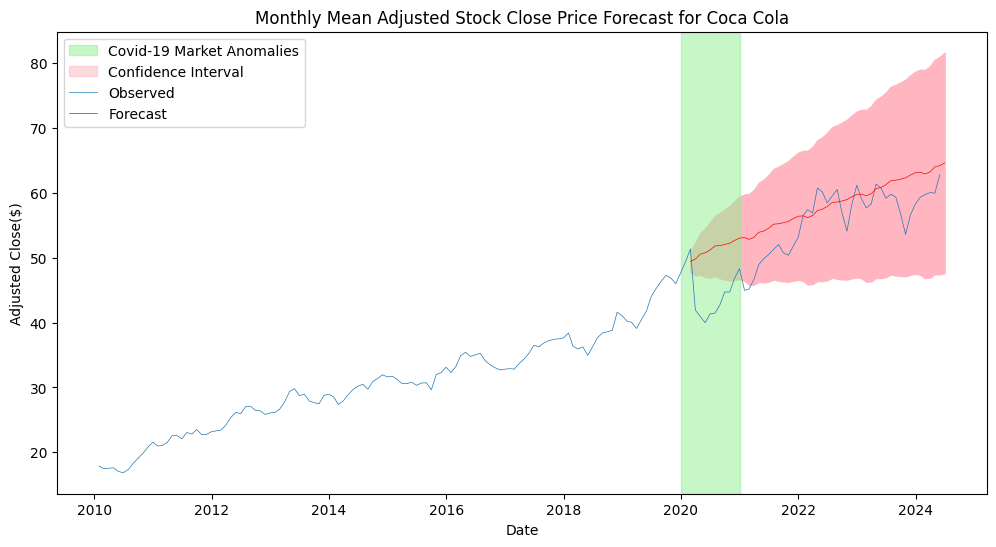

In [20]:
# Forecast testing period future values 
forecast_periods = 53  # Forecast the next x months from test data
forecast = results.get_forecast(steps=forecast_periods) 
forecast_mean = forecast.predicted_mean 
forecast_ci = forecast.conf_int() 
  
# Plot the forecast 
plt.figure(figsize=(12, 6)) 
line_o, = plt.plot(monthly_close, linewidth=0.5, label='Observed') 
line_f, = plt.plot(forecast_mean, label='Forecast', linewidth=0.5, color='red') 
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='#FFB6C1')
plt.axvspan('2020','2021',color='#90EE90',alpha=.5)
plt.legend(handles=[mpatches.Patch(color='#90EE90',alpha=.5, label="Covid-19 Market Anomalies"),mpatches.Patch(color='#FFB6C1',alpha=.5, label="Confidence Interval"),line_o,line_f])
plt.title("Monthly Mean Adjusted Stock Close Price Forecast for "+company) 
plt.xlabel("Date") 
plt.ylabel("Adjusted Close($)")
#plt.legend() 
plt.show()

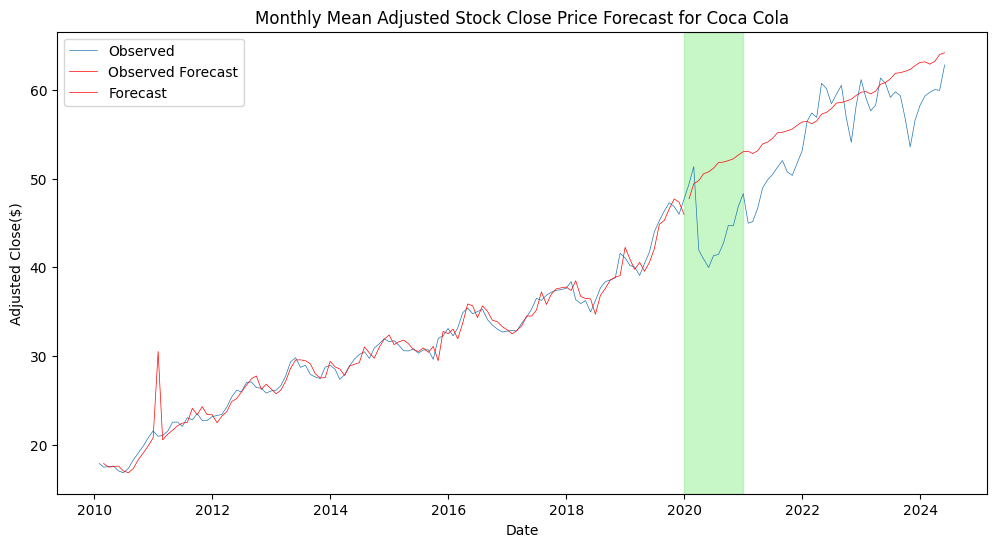

In [21]:
# Forecast for entire period 
forecasts_train = results.predict(start='2010-02-28',end='2019-12-31')
forecasts_test = results.predict(start='2020-01-31',end='2024-05-31')
  
# Plot the forecast 
plt.figure(figsize=(12, 6)) 
line_o, = plt.plot(monthly_close, linewidth=0.5, label='Observed') 
line_t, = plt.plot(forecasts_train, linewidth=0.5, label='Observed Forecast',color='red') 
line_f, = plt.plot(forecasts_test, label='Forecast', linewidth=0.5, color='red') 
plt.axvspan('2020','2021',color='#90EE90',alpha=.5)
plt.title("Monthly Mean Adjusted Stock Close Price Forecast for "+company) 
plt.xlabel("Date") 
plt.ylabel("Adjusted Close($)")
plt.legend() 
plt.show()

In [25]:
observed = monthly_close[-forecast_periods:] 
mae = mean_absolute_error(observed, forecast_mean) 
mse = mean_squared_error(observed, forecast_mean) 
print(f'MAE: {mae}') 
print(f'MSE: {mse}')

MAE: 4.303780580955937
MSE: 27.869498957336482


In [26]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            Adj Close   No. Observations:                  121
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -143.031
Date:                              Wed, 26 Jun 2024   AIC                            292.061
Time:                                      17:58:00   BIC                            300.108
Sample:                                  01-31-2010   HQIC                           295.324
                                       - 01-31-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1486      0.088      1.688      0.091      -0.024       0.321
ma.S.L12      -0.90